## Efficient frontier Part II


In [37]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov() #The covariance matrix

In [13]:
l = ["Food","Beer","Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [18]:
cov.loc[l, l]
%reload_ext autoreload

In [24]:
weights = np.repeat(1/4,4) #Generate an array with 1/4 of 1 and 4 entry
erk.portfolio_return(weights, er[l])



0.19511097196038385

In [26]:
erk.portfolio_vol(weights, cov.loc[l, l])

0.055059195776437045

## 2 Asset Frontier

In [32]:
l = ["Games","Fin"]

In [28]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)] #List comprehension is a way to generate list

In [30]:
len(weights)

20

In [33]:
l

['Games', 'Fin']

<AxesSubplot:xlabel='Vol', ylabel='R'>

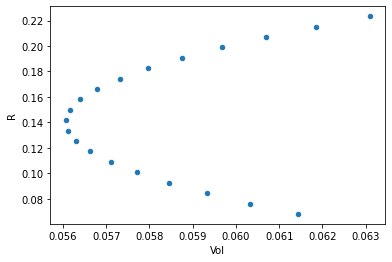

In [41]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l , l]) for w in weights]
ef = pd.DataFrame({"R": rets, "Vol": vols})
ef.plot.scatter(x="Vol", y="R")

In [45]:
l = ["Fin", "Beer"]
%reload_ext autoreload
erk.plot_ef2(25, er[l], cov.loc[l , l])


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/hv/1_92kz110w572ncggsb_c81c0000gp/T/ipykernel_48635/2785788629.py", line 3, in <cell line: 3>
    erk.plot_ef2(25, er[l], cov.loc[l , l])
  File "/Users/sebastiencaron/Desktop/Portfolio Construction with Python/Week 2/Section 1/edhec_risk_kit.py", line 195, in plot_ef2
    raise ValueError("plot_ef2 can only plot 2 asset frontiers")
ValueError: plot_ef2 can only plot 2 asset frontiers

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 1993, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Library/Frameworks/Python.framework/Vers